In [199]:
import numpy as np
import pandas as pd

import statistics
from statsmodels.robust.scale import mad

import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
# Importing all datasets

launch_stats_df= pd.read_csv("Citrix_DS_Exercise_Dataset.csv")
launch_stats_df.head(10)

,user_name,machine_name,logon_time,total_sec,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7
0,user_338,machine_5,02-11-2020 02:25,32.410,0.050,3.507,0.032,1.560,2.040,13.580,8.430
1,user_198,machine_2,02-12-2020 17:21,18.556,0.177,NaN,0.031,1.633,0.567,2.953,7.070
2,user_291,machine_5,02-11-2020 23:18,23.364,0.030,NaN,0.031,1.930,1.540,5.587,11.803
3,user_209,machine_14,2/21/2020 20:57,43.653,0.097,12.550,0.047,1.376,0.190,8.093,8.094
4,user_703,machine_2,02-12-2020 14:12,72.524,0.017,NaN,0.047,2.020,2.400,8.777,15.223
5,user_147,machine_4,2/22/2020 2:45,21.051,0.030,NaN,0.047,1.717,1.136,7.207,8.270
6,user_196,machine_21,02-07-2020 11:36,22.380,0.033,NaN,0.047,1.450,0.713,2.450,5.590
7,user_413,machine_18,02-03-2020 22:45,44.725,0.030,NaN,0.031,1.600,0.320,12.273,4.633
8,user_392,machine_5,2/25/2020 2:58,28.097,0.033,NaN,0.046,1.830,0.217,3.797,14.807
9,user_397,machine_6,02-10-2020 23:28,25.904,0.033,4.506,0.031,1.586,0.173,2.056,10.984


In [201]:
# Let's check the dimensions of the dataframe

launch_stats_df.shape

(2132, 11)

In [202]:
#list out the all colums

launch_stats_df.columns

Index(['user_name', 'machine_name', 'logon_time', 'total_sec', 'stage_1',
       'stage_2', 'stage_3', 'stage_4', 'stage_5', 'stage_6', 'stage_7'],
      dtype='object')

#### Prepocessing of the Data 

##### 1. Clean up and handling invalid formatting  (ex: "mm-dd-yyyy : hr:min:sec"  to valid  format)
          
##### 2.  Identifying missing values
     
##### 3.  Treatment of missing values  (  Deleting rows/imputaion of missing values )
     
##### 4.  Transforming Categorical variable to Numeric if needed
      
##### 5.  Elimeinating insignificant features which are not relevant

In [203]:
# Split the 'logon_time'  into nto two seperate columns : 'date' and 'Time' i,it would be useful
# for further analysis when we need to use the date and more specifically each "day" of the date
# Since the month and year is unchanged for all observations in the data set

launch_stats_df[['Date', 'Time']] = launch_stats_df['logon_time'].str.split(' ', expand=True)

launch_stats_df.head(10)

,user_name,machine_name,logon_time,total_sec,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7,Date,Time
0,user_338,machine_5,02-11-2020 02:25,32.410,0.050,3.507,0.032,1.560,2.040,13.580,8.430,02-11-2020,02:25
1,user_198,machine_2,02-12-2020 17:21,18.556,0.177,NaN,0.031,1.633,0.567,2.953,7.070,02-12-2020,17:21
2,user_291,machine_5,02-11-2020 23:18,23.364,0.030,NaN,0.031,1.930,1.540,5.587,11.803,02-11-2020,23:18
3,user_209,machine_14,2/21/2020 20:57,43.653,0.097,12.550,0.047,1.376,0.190,8.093,8.094,2/21/2020,20:57
4,user_703,machine_2,02-12-2020 14:12,72.524,0.017,NaN,0.047,2.020,2.400,8.777,15.223,02-12-2020,14:12
5,user_147,machine_4,2/22/2020 2:45,21.051,0.030,NaN,0.047,1.717,1.136,7.207,8.270,2/22/2020,2:45
6,user_196,machine_21,02-07-2020 11:36,22.380,0.033,NaN,0.047,1.450,0.713,2.450,5.590,02-07-2020,11:36
7,user_413,machine_18,02-03-2020 22:45,44.725,0.030,NaN,0.031,1.600,0.320,12.273,4.633,02-03-2020,22:45
8,user_392,machine_5,2/25/2020 2:58,28.097,0.033,NaN,0.046,1.830,0.217,3.797,14.807,2/25/2020,2:58
9,user_397,machine_6,02-10-2020 23:28,25.904,0.033,4.506,0.031,1.586,0.173,2.056,10.984,02-10-2020,23:28


In [204]:
# Since the month and year are same is unchanged for all observations in the data set, it makes sense 
# to extract the day from the 'logon_time' variable and derive a new 'logon_day' variable
# in the same dataframe.As mentioned above the year and month are not important because 
# they are same each observations, hence we can use the day 'logon_day' column more frequently 
# for further analysis in our  investigation 

launch_stats_df['logon_time'] = launch_stats_df['logon_time'].astype('datetime64[ns]')
launch_stats_df['logon_day'] = launch_stats_df['logon_time'].dt.day
launch_stats_df['logon_day']

0       11
1       12
2       11
3       21
4       12
        ..
2127    10
2128    27
2129    18
2130    29
2131     7
Name: logon_day, Length: 2132, dtype: int64

In [205]:
#List the few entries to confirm the new column 'logon_day' properly created at the end

launch_stats_df.head(10)

,user_name,machine_name,logon_time,total_sec,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7,Date,Time,logon_day
0,user_338,machine_5,2020-02-11 02:25:00,32.410,0.050,3.507,0.032,1.560,2.040,13.580,8.430,02-11-2020,02:25,11
1,user_198,machine_2,2020-02-12 17:21:00,18.556,0.177,NaN,0.031,1.633,0.567,2.953,7.070,02-12-2020,17:21,12
2,user_291,machine_5,2020-02-11 23:18:00,23.364,0.030,NaN,0.031,1.930,1.540,5.587,11.803,02-11-2020,23:18,11
3,user_209,machine_14,2020-02-21 20:57:00,43.653,0.097,12.550,0.047,1.376,0.190,8.093,8.094,2/21/2020,20:57,21
4,user_703,machine_2,2020-02-12 14:12:00,72.524,0.017,NaN,0.047,2.020,2.400,8.777,15.223,02-12-2020,14:12,12
5,user_147,machine_4,2020-02-22 02:45:00,21.051,0.030,NaN,0.047,1.717,1.136,7.207,8.270,2/22/2020,2:45,22
6,user_196,machine_21,2020-02-07 11:36:00,22.380,0.033,NaN,0.047,1.450,0.713,2.450,5.590,02-07-2020,11:36,7
7,user_413,machine_18,2020-02-03 22:45:00,44.725,0.030,NaN,0.031,1.600,0.320,12.273,4.633,02-03-2020,22:45,3
8,user_392,machine_5,2020-02-25 02:58:00,28.097,0.033,NaN,0.046,1.830,0.217,3.797,14.807,2/25/2020,2:58,25
9,user_397,machine_6,2020-02-10 23:28:00,25.904,0.033,4.506,0.031,1.586,0.173,2.056,10.984,02-10-2020,23:28,10


In [206]:
# Make sure the 'logon_day'  column has been properly extracted  from the 
#'logon_time' column  

list(zip(launch_stats_df['Date'], launch_stats_df['logon_day'] ))

[('02-11-2020', 11),
 ('02-12-2020', 12),
 ('02-11-2020', 11),
 ('2/21/2020', 21),
 ('02-12-2020', 12),
 ('2/22/2020', 22),
 ('02-07-2020', 7),
 ('02-03-2020', 3),
 ('2/25/2020', 25),
 ('02-10-2020', 10),
 ('03-02-2020', 2),
 ('2/27/2020', 27),
 ('2/18/2020', 18),
 ('02-07-2020', 7),
 ('2/17/2020', 17),
 ('02-12-2020', 12),
 ('2/28/2020', 28),
 ('02-10-2020', 10),
 ('02-06-2020', 6),
 ('2/24/2020', 24),
 ('2/19/2020', 19),
 ('02-06-2020', 6),
 ('2/19/2020', 19),
 ('02-06-2020', 6),
 ('2/24/2020', 24),
 ('2/19/2020', 19),
 ('2/26/2020', 26),
 ('2/21/2020', 21),
 ('02-08-2020', 8),
 ('2/23/2020', 23),
 ('2/25/2020', 25),
 ('02-07-2020', 7),
 ('2/26/2020', 26),
 ('2/26/2020', 26),
 ('02-04-2020', 4),
 ('2/19/2020', 19),
 ('2/21/2020', 21),
 ('02-06-2020', 6),
 ('02-05-2020', 5),
 ('2/20/2020', 20),
 ('2/16/2020', 16),
 ('02-06-2020', 6),
 ('2/19/2020', 19),
 ('03-02-2020', 2),
 ('02-11-2020', 11),
 ('2/17/2020', 17),
 ('02-06-2020', 6),
 ('2/27/2020', 27),
 ('03-02-2020', 2),
 ('02-12-202

In [207]:
# Drop the 'logon_time' column now since we have already extracted and created new  'logon_day' 
# variable to keep track the each individual day in a month

launch_stats_df.drop('logon_time' , axis = 1, inplace = True)

In [208]:
# Identifying the missing values percentage in the data set

round(100*(launch_stats_df.isnull().sum()/len(launch_stats_df.index)), 2)

user_name        0.00
machine_name     0.00
total_sec        0.00
stage_1          0.00
stage_2         55.25
stage_3          0.00
stage_4          1.08
stage_5          0.00
stage_6          0.42
stage_7          0.42
Date             0.00
Time             0.09
logon_day        0.00
dtype: float64

In [209]:
# We can observed from the above missing values that in  'stage_4', 'stage_6', 'stage_7'  and 'Time'
# which  have negligible amount missing value percentage (1.08%, 0.42% , 0.42%  and 0.09% 
# respectively) with  respect to size  of entire data frame. 
# Note that 'stage_2' has significant number of missing values 55.25% ,that  we would have to handle 
# by proper value impuation, Hence let us drop the rows having missing values only for 
# 'stage_4', 'stage_6', 'stage_7' and 'Time'.

launch_stats_df.dropna(how='any', subset=['stage_4', 'stage_6', 'stage_7', 'Time'], inplace = True)

In [210]:
# Confirmning the missing values are removed from the 'stage_4', 'stage_6', 'stage_7'  and 'Time'
# except 'stage_2' whcih we will handle later by proper value imputation

round(100*(launch_stats_df.isnull().sum()/len(launch_stats_df.index)), 2)

user_name        0.00
machine_name     0.00
total_sec        0.00
stage_1          0.00
stage_2         55.84
stage_3          0.00
stage_4          0.00
stage_5          0.00
stage_6          0.00
stage_7          0.00
Date             0.00
Time             0.00
logon_day        0.00
dtype: float64

In [211]:
# Confirmning the all missing values are removed from the including  'stage_2' which we  have 
# imputed by the "median" of the 'stage_2' variable, since the distributionof the "stage_2" 
# is not symmetric

launch_stats_df['stage_2'].fillna(launch_stats_df['stage_2'].median(), inplace = True)
round(100*(launch_stats_df.isnull().sum()/len(launch_stats_df.index)), 2)

user_name       0.0
machine_name    0.0
total_sec       0.0
stage_1         0.0
stage_2         0.0
stage_3         0.0
stage_4         0.0
stage_5         0.0
stage_6         0.0
stage_7         0.0
Date            0.0
Time            0.0
logon_day       0.0
dtype: float64

In [212]:
# Let us also check the lowest launch duration time
launch_stats_df['total_sec'].min()

13.085999999999999

In [213]:
# Just to check the highest launch duration time
launch_stats_df['total_sec'].max()

419.76300000000003

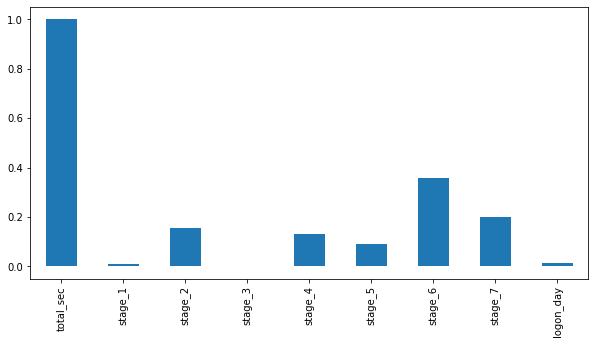

In [214]:
# Get Correlation of "total_sec" with respect to other variables

plt.figure(figsize=(10,5))
launch_stats_df.corr()['total_sec'].plot(kind='bar')

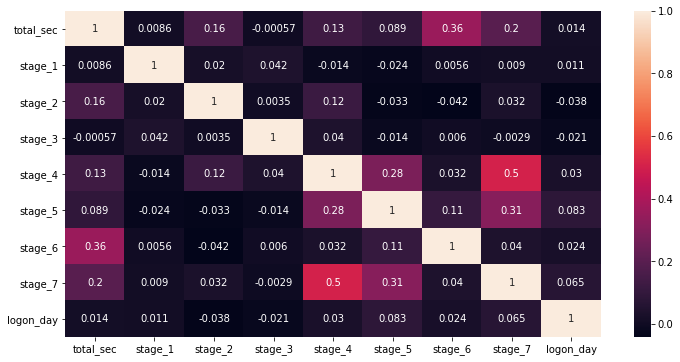

In [215]:
# Also plotting the correlation matrix using seaborn heat map, it will help us to examine 
# the corelation among variables with the magintude of corelation 

%matplotlib inline

plt.figure(figsize = (12,6))
sns.heatmap(launch_stats_df.corr(),annot = True)

### Question 1.  Detecting launch instances, or groups of launch instances, with an unusually high launch duration time

In [216]:
# Check the list of column finally after all preporocessing
launch_stats_df.columns

Index(['user_name', 'machine_name', 'total_sec', 'stage_1', 'stage_2',
       'stage_3', 'stage_4', 'stage_5', 'stage_6', 'stage_7', 'Date', 'Time',
       'logon_day'],
      dtype='object')

In [217]:
# Check also how observations looks post  preprocessing  and after handling missing values 
# i.e. after all desired preporocessing completed

launch_stats_df.head(10)

,user_name,machine_name,total_sec,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7,Date,Time,logon_day
0,user_338,machine_5,32.410,0.050,3.507,0.032,1.560,2.040,13.580,8.430,02-11-2020,02:25,11
1,user_198,machine_2,18.556,0.177,5.293,0.031,1.633,0.567,2.953,7.070,02-12-2020,17:21,12
2,user_291,machine_5,23.364,0.030,5.293,0.031,1.930,1.540,5.587,11.803,02-11-2020,23:18,11
3,user_209,machine_14,43.653,0.097,12.550,0.047,1.376,0.190,8.093,8.094,2/21/2020,20:57,21
4,user_703,machine_2,72.524,0.017,5.293,0.047,2.020,2.400,8.777,15.223,02-12-2020,14:12,12
5,user_147,machine_4,21.051,0.030,5.293,0.047,1.717,1.136,7.207,8.270,2/22/2020,2:45,22
6,user_196,machine_21,22.380,0.033,5.293,0.047,1.450,0.713,2.450,5.590,02-07-2020,11:36,7
7,user_413,machine_18,44.725,0.030,5.293,0.031,1.600,0.320,12.273,4.633,02-03-2020,22:45,3
8,user_392,machine_5,28.097,0.033,5.293,0.046,1.830,0.217,3.797,14.807,2/25/2020,2:58,25
9,user_397,machine_6,25.904,0.033,4.506,0.031,1.586,0.173,2.056,10.984,02-10-2020,23:28,10


####   In order to detect the  instances suffering by high launch time duration we need to determine a "threshold" for the total launch duration time that can be used  as reference to detect the instances with unusually high launch duration time.

In [218]:
# Since in this  data set we have a skewed distribution of the "launch time duration", the "median" 
# is often the best measure  of  central tendency.Outliers and skewed data have a smaller effect on 
# the 'median' with respect to 'mean'. We have demonestrated this by univariate analysis using  
# histogram which shows the left skewness of the of the 'total_sec' varibale

# Hence compute the 'median' of the launch time duration to get the  threshold value.Since the 
# magintude  of 'launch time duration' has a  variablity across multiple process/instances launched 
# perday over a period of month.

launch_time_median = statistics.median(launch_stats_df["total_sec"])
print("The threshold or median value of launch time duration : {}".format(launch_time_median))

The threshold or median value of launch time duration : 29.451999999999998


In [219]:
# We can also determine the median from "describe" method in pandas using the 50% percetile value. 
# We can use df.describe(). The 50% value is the median since it  reperesens the middle value. 
# As the 'median' is the value that splits the dataset in half. 
# This is  observed from below output that the 'total_sec' 50% percentile value same as statistcal 
# computation of mean as above 29.45

launch_stats_df.describe(percentiles = [0.25, 0.50, 0.75] )

,total_sec,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7,logon_day
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,35.088289,0.044104,5.864060,0.048782,1.729737,0.835572,9.527423,8.983544,15.319676
std,24.906210,0.049243,3.348721,0.051110,0.399918,0.770464,9.379367,3.773904,8.733380
min,13.086000,0.013000,0.120000,0.015000,1.170000,0.037000,0.834000,3.817000,1.000000
25%,22.642500,0.030000,5.293000,0.031000,1.547000,0.290000,3.580000,6.268000,7.000000
50%,29.452000,0.033000,5.293000,0.032000,1.663000,0.664000,6.180000,8.270000,17.000000
75%,39.684500,0.050000,5.293000,0.047000,1.770000,1.083500,11.363000,10.661500,24.000000
max,419.763000,1.223000,49.154000,1.750000,11.817000,11.757000,101.500000,50.350000,29.000000


In [220]:
# Detecting the list of application suffering by high launch time duration.The detection mechinsm
# used by computing "threshold" or 'median' for the total 'launch duration' time and  that is a used
# as a refernce to  detect the instances suffered by  unusually high launch time duration 
# Precisely those instances have been impacted by more variance with respect to the meadian 
# of launch duration time 

high_launch_time_df= launch_stats_df.loc[(launch_stats_df['total_sec']  > launch_time_median), ]

print("List groups of launch instances, with an unusually high launch duration time :\n\n" )
print(high_launch_time_df[['Date', 'logon_day', 'user_name', 'machine_name', 'total_sec']])

List groups of launch instances, with an unusually high launch duration time :


            Date  logon_day user_name machine_name  total_sec
0     02-11-2020         11  user_338    machine_5     32.410
3      2/21/2020         21  user_209   machine_14     43.653
4     02-12-2020         12  user_703    machine_2     72.524
7     02-03-2020          3  user_413   machine_18     44.725
10    03-02-2020          2  user_647   machine_25     47.245
...          ...        ...       ...          ...        ...
2125  02-05-2020          5  user_485    machine_8     32.350
2127  02-10-2020         10  user_380    machine_5     34.925
2128   2/27/2020         27   user_13    machine_5     33.732
2130   2/29/2020         29   user_61    machine_7     29.637
2131  02-07-2020          7  user_388    machine_6     31.037

[1048 rows x 5 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002589B7F57C8>]],
      dtype=object)

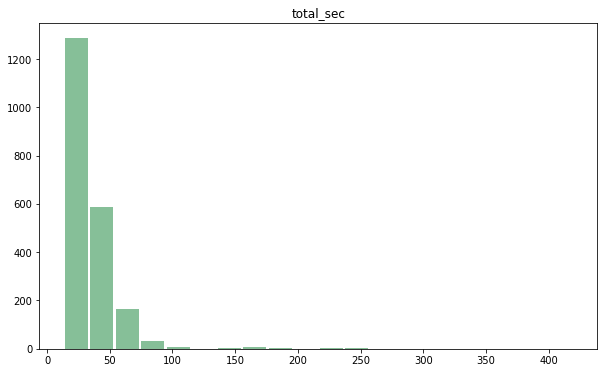

In [221]:
# We can also observe from the following histogram which shows the left "skewed" distribution of the 
# launch time duration 'total_sec', in case of skewed distribution we should consider 'median' for 
# better represention of central tendency. 
# It is being also observed almost 50%  observations ( ~1066) where the launchtime lies 
# between ~1 sec to ~30 sec

launch_stats_df.hist(column='total_sec', bins=20, grid=False, figsize=(10,6), color='#86bf98', zorder=2, rwidth=0.9)

#### Analysis:

The above observations demonstrate the groups of launch instances, with an unusually high launch duration time.
 
##### The central logic of 'threshold’ determination: 
We need to identify a "threshold" value for the launch duration which varies for multiple instances launched in each day over period of month. The variability of the launch time duration (represented by ‘total_sec’ ) occurred due to the multiple reasons like more number of instances in a day, specific substages of the launched process etc. Therefore, the "threshold" of launch time duration needs to be used as refernce line to detect the instances suffered by unusually high launch duration time. We have computed the 'median' of the launch time duration to get the threshold value.
 
##### We used median (not the ‘mean’) to reckon the 'threshold’ , the reason is described  below :
In case of symmetrical distribution for continuous data, the mean, median, and mode are equal. In that case, we tend to use the mean because it includes all of the data in the calculations. However, if we have a skewed distribution like the "launch time duration" shown by histogram, the 'median' is often the best measure of central tendency. In addition to that outliers and skewed data have a smaller effect on the 'median' compare to 'mean'. The histogram of the 'total_sec' shown above demonstrates the skewness of the of the 'total_sec' variables. Hence, we have chosen 'median' to get the fair 'threshold' value.

The threshold or median value of launch time duration : 29.45 sec


In [222]:
# Count the  number of application suffering by high launch time duration

print(len(high_launch_time_df.index))

1048


### Question 2.  Detecting any temporal changes in the magnitude of launch duration that the average user may have experienced. For such detections it would be nice to have a measure of how big the change is.


                                                                                                                                            



In [223]:
# In statistics, the "absolute deviation" of an element of a data set is the absolute difference
# between that element and a given point (median or mean).Typically the deviation is reckoned from
# the central value, most often the median of the data set.

# Therefore, let us derive  a new variable 'abs_dev' in the data frame to keep track of  the 
# "absolute deviation" for each instances( observations)
# The formula to compute "absolute deviation" is : D(i) = | X(i) - median(X)|

launch_stats_df['abs_dev'] = abs(launch_stats_df['total_sec'] - launch_stats_df['total_sec'].median())
print("The \"absolute deviation\" of the launch time duration per day over a period of month : ")
launch_stats_df['abs_dev'].head(30)

The "absolute deviation" of the launch time duration per day over a period of month : 


0      2.958
1     10.896
2      6.088
3     14.201
4     43.072
5      8.401
6      7.072
7     15.273
8      1.355
9      3.548
10    17.793
11     0.585
12     4.032
13     6.659
14     8.530
15     2.986
16    13.110
17    44.891
18     2.199
19     5.416
20     5.729
21     8.478
22     6.625
23    36.325
24     6.161
25     8.492
26     5.218
27    24.760
28     2.301
29     6.486
Name: abs_dev, dtype: float64

In [224]:
# Determine the mean launch time of all the instances launched  per day, we can use "groupby" 
# clause to compute the mean launch time that indicates the average 'launch' response time 
# experinced by user in each day over a month

grouped_by_day_df = launch_stats_df.groupby(by = ['logon_day'])
per_day_mean_launch_time = grouped_by_day_df['total_sec'].mean()

print( "Mean launch time per day over a period of a month :\n")
print(per_day_mean_launch_time)

Mean launch time per day over a period of a month :

logon_day
1     27.463538
2     30.767336
3     34.522942
4     31.805550
5     39.156117
6     29.448476
7     35.456155
8     29.757640
9     33.457529
10    33.464323
11    33.937037
12    40.448783
13    37.349329
14    43.704564
15    42.811586
16    44.182364
17    40.782800
18    34.945705
19    37.052935
20    31.452327
21    35.707741
22    39.858647
23    31.222800
24    38.671833
25    33.448383
26    31.282627
27    35.835558
28    32.590336
29    29.232564
Name: total_sec, dtype: float64


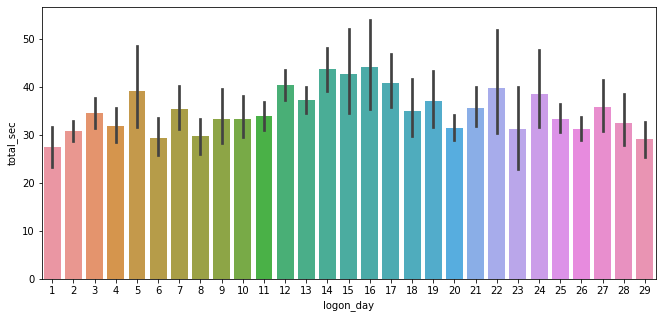

In [225]:
# Let us plot a barplot to visualize the  mean/average of launch time duration 'total_sec' samples
# computed above.It is useful for performance evalaution in a day i.e to understand the performance variation 
# experienced by users each day over a period of a month

plt.figure(figsize=(11,5))
sns.barplot(x = "logon_day", y = "total_sec", data = launch_stats_df )

### Analysis :
Analysis of the above bar graph:
The above bar plot demonstrates the mean/average of "launch time duration" which is here a quantitative sample represented by 'total_sec' in the data set. It is useful to understand and inspect the performance variation experienced by user each day over a period of a month.

The vertical overlay-ed black line on each bar in the bar graph signifies graphical representation of the variability of data per day i.e. variability of "launch time duration" of multiple instances launched per day basis.


In [226]:
# Determine the mean "absoluate deviation"  of all the instances instantiated  per day, we can use 
# "groupby" clause to compute the mean launch time experinced by user in each day

grouped_by_day_df = launch_stats_df.groupby(by = ['logon_day'])
per_day_mean_abs_deviation = grouped_by_day_df['abs_dev'].mean()

print( "Mean Absolute Deviation per day over a period of a month :\n")
print(per_day_mean_abs_deviation)

Mean Absolute Deviation per day over a period of a month :

logon_day
1      6.573692
2      8.683287
3     11.822523
4     10.766615
5     17.857417
6     10.399738
7     11.553464
8      7.270680
9      9.556000
10    11.143903
11     9.048695
12    13.800711
13    10.687586
14    16.793545
15    16.466828
16    17.665364
17    15.481446
18    13.688346
19    14.866758
20    10.078173
21    12.558037
22    18.517784
23    11.769600
24    16.453000
25     9.297106
26     7.646973
27    14.551062
28    12.423361
29     9.388103
Name: abs_dev, dtype: float64


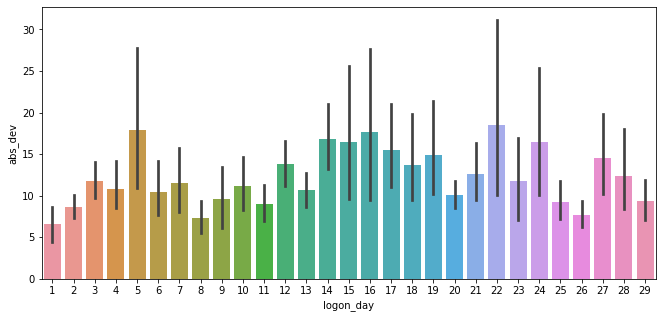

In [227]:
# Let us plot a bar plot to visualize  the "absolute deviation" for each instances experinced by user
# each day over a month.It is an important exploratory data analysis to get the feel of the 
# 'launch time duration' variabilty experinced by the users per day over a month. The robust measure 
# for this  to compute the "absolute deviation"  which is defined by D(i) = | X(i) - median(X)| and 
# stored in a new column 'abs_dev' , where : X(i) =>  launch time duration 'total_sec' for ith 
# intance median(X) => the mean of  launch time duration 'total_sec' samples

plt.figure(figsize=(11,5))
ax = sns.barplot(x = "logon_day", y = "abs_dev", data = launch_stats_df )

### Analysis :

Analysis of the above bar graph:
The above bar plot shows more deeper inspection of "temporal changes" of launch time duration with respect to its mean computed above. The above graph demonstrates the variability of the "absolute deviation" in launch time duration, where the "absolute deviation" is a quantitative sample represented by 'abs_dev’ feature in the data set and it is defined by 
#### Di = | Xi - median(X)|
#### Xi => launch time duration 'total_sec' for ith instance 
#### median(X) => the mean of launch time duration 'total_sec'

This plot helps us to get a sense how a user experienced the 'temporal changes' in the magnitude of launch duration variability per day over a period of a month.

The vertical overlay-ed black line on each bar in the bar chart signifies graphical representation of the variability of data per day i.e. variability of "absolute deviation" of multiple instances launched per day basis.


In [228]:
# Determine the  "temporal changes" in the magnitude of launch duration or "variability" of the
# univariate sample 'total_sec'.We would  use Median Mbsolute Deviation (MAD)  which is a robust 
# measure of the 'variability' to detect the "tempral changes" in the magnitude of launch 
# duration an average user experenced.
#
# In short the median absolute deviation(MAD) is a measure of statistical dispersion of the data.
# The MAD is a more robust estimator of scale than the sample "variance" or "standard deviation".
# Moreover, the MAD is a robust statistic, being more resilient to outliers in a data set than the 
# standard deviation. More details of MAD are explained in "Analysis" section below.
 
# Ideally the median absolute deviation (MAD) is defined as  the median of the "absolute deviations" 
# from the data's median(X) i.e. in our experiment it is median(‘total_sec’).The "absolute deviations"  of launch time of  processes or instances are 
# represented by the derived  "abs_dev"  variable in the data frame. Note that the median of the
# univariate quantative data 'total_sec' we have already calculated earlier, that is the threshold 
# value of launch time duration : 29.3515 sec 

# Here, the median absolute deviation (MAD) can also be calculated directly using stats model 
# "statsmodelsrobust.scale.mad" module
# Formula : MAD = median(|X(i) - median(X)|)

median_absolute_deviation = mad(launch_stats_df['abs_dev'])
                                
print("The \"temporal changes\" or \"Variability\" in the magnitude of launch time duration an average user experienced is " + 
                                                    str(median_absolute_deviation) + " sec")

# We can also revalidate the MAD by caluclating manual steps

# mad = launch_stats_df['abs_dev'] - launch_stats_df['abs_dev'].median()

The "temporal changes" or "Variability" in the magnitude of launch time duration an average user experienced is 6.2891986109007645 sec


### Analysis:

#### Why Median Absolute Deviation(MAD) is used instead of Variance or Standard Deviation:
The median absolute deviation is a measure of statistical dispersion of the data. The MAD is a more robust estimator of scale than the sample variance or standard deviation. Moreover, the MAD is a robust statistic, being more resilient to outliers in a data set than the standard deviation. In the standard deviation, the distances from the mean are squared, so large deviations are weighted more heavily, and thus outliers can heavily influence it. In the MAD, the deviations of a small number of outliers are irrelevant. Since we have already noticed from the histogram the ‘total_sec’ from which the ‘abs_dev’ derived highly left skewed data set with few outliers,hence in our study MAD is a perfect measure for variability of a univariate variable 'abs_dev'. Also the skewness of the ’total_sec’ is clearly explained by launch time duration of ‘total_sec’, the lowest is 13.085 sec
and the highest is 419.76 sec.These values are already computed at the very begining of data preprocessing.

Median absolute deviation (MAD) is defined as the median of the "absolute deviations" from the data's median(X), in our experiment it is median(‘total_sec’).As explained above the "absolute deviation" of launch time of processes/instances are represented by a new derived "abs_dev" variable. Hence here the median absolute deviation (MAD) is used to calculate the mean of "absolute deviations" to detect the "temporal changes" or "Variability" that an average user may have experienced.

The "temporal changes" or "Variability" in the magnitude of launch duration an average user could have experienced is: 6.289 sec 



### 3. Identifying, if possible, potential root causes for the detections of Questions 1 and 2 (e.g. identify whether the host machine, or any of the sub-stages of the launch process are the root cause of the detections).



                                                                                                                       
                                                                                                                      
                                                                                                                      
                                                                                                                     

In [229]:
# Determine the mean launch time of all the instances instantiated  per day in each machine used in
# that day, we can use "groupby" clause to compute the mean launch time experinced by user in each day

grouped_by_day_machine_df = high_launch_time_df.groupby(by = ['Date', 'logon_day', 'machine_name' ])
per_day_load = grouped_by_day_machine_df['total_sec'].count()
per_day_load_df = grouped_by_day_machine_df['total_sec'].count().to_frame(name = 'inst_count').reset_index()
print( "Mean Absolute Deviation per day in each machine over a period of a month :\n")
per_day_load


Mean Absolute Deviation per day in each machine over a period of a month :



Date        logon_day  machine_name
02-03-2020  3          machine_0       1
                       machine_1       2
                       machine_14      1
                       machine_17      1
                       machine_18      2
                                      ..
2/29/2020   29         machine_21      1
                       machine_23      2
                       machine_24      1
                       machine_5       4
                       machine_7       4
Name: total_sec, Length: 322, dtype: int64

In [230]:
# Compute the mean instance counts launched in each day

per_day_load = grouped_by_day_machine_df['total_sec'].count()
mean_load_inst_count = statistics.mean(per_day_load_df["inst_count"])
print("Average Instances launched per day: ")
print(mean_load_inst_count)

Average Instances launched per day: 
3.2546583850931676


In [231]:
# Sort the instances count in decsending order perday 

per_day_load_df.sort_values(by='logon_day', ascending=False, inplace = True)
per_day_load_df.head(30)

,Date,logon_day,machine_name,inst_count
321,2/29/2020,29,machine_7,4
320,2/29/2020,29,machine_5,4
319,2/29/2020,29,machine_24,1
318,2/29/2020,29,machine_23,2
317,2/29/2020,29,machine_21,1
316,2/29/2020,29,machine_18,1
315,2/29/2020,29,machine_17,1
314,2/29/2020,29,machine_15,1
313,2/29/2020,29,machine_14,3
312,2/29/2020,29,machine_1,1


In [232]:
# Determine days in which instance counts are relatively high with respect to average instance 
# count pre day, value ~4  is the mean instance count calculated above. 

high_load_day_df = per_day_load_df.loc[(per_day_load_df['inst_count']  >= 4), :]
high_load_day_df

,Date,logon_day,machine_name,inst_count
321,2/29/2020,29,machine_7,4
320,2/29/2020,29,machine_5,4
305,2/28/2020,28,machine_2,7
309,2/28/2020,28,machine_5,8
310,2/28/2020,28,machine_6,10
...,...,...,...,...
11,02-03-2020,3,machine_4,9
7,02-03-2020,3,machine_22,4
146,03-02-2020,2,machine_5,6
142,03-02-2020,2,machine_24,5


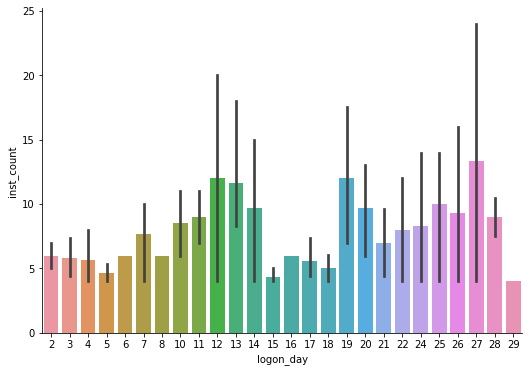

In [233]:
# Let us plot the instances count against each highly loaded day where instance counts are above mean 
# instance count, with this we could observe the set of days where high number of instances launched.

sns.catplot(x='logon_day',
                  y='inst_count', kind="bar", height=5.27, aspect=11.7/8.27, data=high_load_day_df)

In [234]:
# Check the maximum instance count in day

per_day_load_df['inst_count'].max()

24

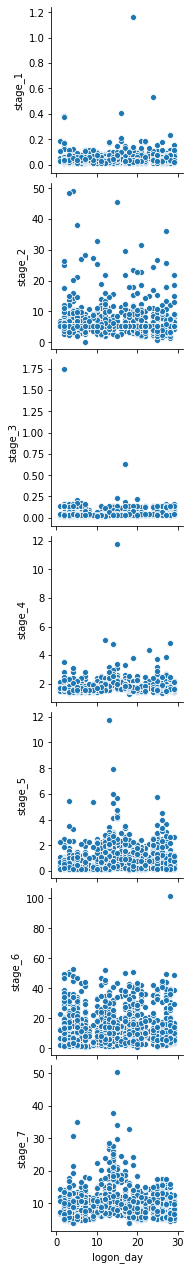

In [235]:
# Let us observe the distribution of all substages against each day over a period of month, 
# this will help us to get more insight of launched process substages pattern and  what are
# the substages spent more time to launch a process. We have to consider substages which consumed 
# significant amount of time in most of the days.

sns.pairplot(data=high_launch_time_df,
                  x_vars=['logon_day'], 
                  y_vars=['stage_1','stage_2', 'stage_3', 'stage_4', 'stage_5', 'stage_6', 'stage_7'])

In [236]:
# Also let us determine the mean of each  substages to lauch a process  to understand the set 
# of substages spent significant amount time during launching an instance.
 

stage_1_mean = high_launch_time_df['stage_1'].mean()
stage_2_mean = high_launch_time_df['stage_2'].mean()
stage_3_mean = high_launch_time_df['stage_3'].mean()
stage_4_mean = high_launch_time_df['stage_4'].mean()
stage_5_mean = high_launch_time_df['stage_5'].mean()
stage_6_mean = high_launch_time_df['stage_6'].mean()
stage_7_mean = high_launch_time_df['stage_7'].mean()
stages_dict = { "stage_1 Mean" : stage_1_mean, "stage_2 Mean" : stage_2_mean,
                "stage_3 Mean" : stage_3_mean, "stage_4_mean" : stage_4_mean,
                "stage_5_mean" : stage_5_mean, "stage_6_mean" : stage_6_mean,
                "stage_7_mean" : stage_7_mean
              }

print("The mean of each substages to launch an instance:\n")
for stage, stage_mean in stages_dict.items() :
    print(stage, stage_mean)
    

The mean of each substages to launch an instance:

stage_1 Mean 0.045489503816794195
stage_2 Mean 6.523214694656435
stage_3 Mean 0.04980438931297628
stage_4_mean 1.785447519083971
stage_5_mean 0.9508969465648859
stage_6_mean 14.009079198473295
stage_7_mean 10.185596374045808


#### Analysis

The above observation of pair plot and the mean of each of the substages time exhibits the fact that 'stage_2', 'stage_6' and 'stage_7' has significant impact/contribution to increase the degree of the magnitude of "launch time duration". Specially the 'stage_6' and 'stage_7' 
consume substantial amount of time in launching an instance.

Hence, we will consider 'stage_2', 'stage_6' and 'stage_7' for our analysis to identify the root cause of high launch time instances and the "temporal changes” experienced by the user (Question and 1 and Question 2).

The following steps have been performed to continue our analysis and investigation further for Question 3, which is to identify the root cause for Question 1 and 2:

1.	We will compute the mean of each of the significant substages stage_2', 'stage_6’ and 'stage_7’ per day over a period of month. This is essential to demonstrate how    response time of each substages impact on launch time duration of the application launched per day over a period of month.

2.	Next, determine the sample mean for each of the above substages stage_2, stage_6 and stage_7 per day over a month. As per example: determine the sample mean of  'stage_6' time  per day over a month.

3.	Then, determine the sample distribution mean for each of the above substages stage_2, stage_6 and stage_7 for the month. As per example: From the sample mean we can compute the sample distribution mean for the month for stage 6.

4.	Finally compute the mean of sample distribution mean of 3 substages ( 'stage_2', 'stage_6' and 'stage_7')  to get a refence line to detect the root cause for  high launch time instances which might caused to rise  the magnitude of  "temporal changes"  experienced by the user over a month.


5.	Visualization of the above steps for each of the 'sub stage' ('stage_2', 'stage_6' 
    and 'stage_7') against 'each day' over a period of month.
    
    
Let us perform the above  tasks sequentially:


#### Step 1,2  and 3: Compute the mean, sample mean and sample distribution mean of each of the significant substages stage_2', 'stage_6’ and 'stage_7’  over a period of month.

In [237]:
# Determine the sample mean of 'stage_2' time per day, we can use 
# "groupby" clause to compute  the sample mean of 'stage_2' time

# From the sample mean  we can also compute the sample distribution mean for the month for stage 2

grouped_by_day_df = high_launch_time_df.groupby(by = ['logon_day'])
stage_2_day_sample_mean_time = grouped_by_day_df['stage_2'].mean()
stage_2_month_sample_distribution_mean_time = stage_2_day_sample_mean_time.mean()

print( "Sample mean for stage 2  perday in the month :\n")
print(stage_2_day_sample_mean_time)
print("\n")

print( "Sample distribution mean for stage 2 in the month :\n")
print(stage_2_month_sample_distribution_mean_time)

Sample mean for stage 2  perday in the month :

logon_day
1     5.730333
2     6.798109
3     7.066333
4     7.679932
5     7.005109
6     6.675304
7     5.850349
8     5.992833
9     8.691333
10    7.575032
11    6.056643
12    6.561780
13    5.497962
14    5.690195
15    7.441857
16    5.751231
17    6.835956
18    6.400886
19    6.940113
20    6.174022
21    7.194075
22    5.700917
23    9.156500
24    6.154868
25    6.017896
26    5.820487
27    7.035800
28    5.105188
29    8.314842
Name: stage_2, dtype: float64


Sample distribution mean for stage 2 in the month :

6.652271865166804


In [238]:
# Determine the sample mean of 'stage_6' time   per day, we can use 
# "groupby" clause to compute  the sample mean of 'stage_6' time 

# From the sample mean  we can compute the sample distribution mean for the month for stage 6

grouped_by_day_df = high_launch_time_df.groupby(by = ['logon_day'])
stage_6_day_sample_mean_time = grouped_by_day_df['stage_6'].mean()
stage_6_month_sample_distribution_mean_time = stage_6_day_sample_mean_time.mean()

print( "Sample mean for stage 6 perday in the month :\n")
print(stage_6_day_sample_mean_time)
print("\n")

print( "Sample distribution mean for stage 6 in  the month : :\n")
print(stage_6_month_sample_distribution_mean_time)

Sample mean for stage 6 perday in the month :

logon_day
1     10.546000
2     16.736200
3     14.821042
4     11.819886
5     12.839587
6     11.625478
7     13.318233
8      8.638500
9      6.603444
10    11.494903
11    12.344929
12    12.550373
13    14.263231
14    15.086927
15    12.934048
16    12.753077
17    13.170422
18    16.665857
19    15.037887
20    16.318935
21    15.502425
22    14.866167
23    14.667500
24    11.830763
25    12.457375
26    11.916256
27    16.878382
28    18.053958
29    13.569158
Name: stage_6, dtype: float64


Sample distribution mean for stage 6 in  the month : :

13.424515261897417


In [239]:
# Determine the sample mean of 'stage_7' time   per day, we can use 
# "groupby" clause to compute  the sample mean of 'stage_7' time 

# From the sample mean  we can compute the sample distribution mean for the month for stage 7

grouped_by_day_df = high_launch_time_df.groupby(by = ['logon_day'])
stage_7_day_sample_mean_time = grouped_by_day_df['stage_7'].mean()
stage_7_month_sample_distribution_mean_time = stage_7_day_sample_mean_time.mean()

print( "Sample mean for stage 7  perday in the month :\n")
print(stage_7_day_sample_mean_time)
print("\n")

print( "Sample distribution mean for stage 7 in the month :\n")
print(stage_7_month_sample_distribution_mean_time)

Sample mean for stage 7  perday in the month :

logon_day
1      9.625333
2      7.902145
3      9.134167
4      9.204000
5      8.270761
6      9.679261
7      9.241977
8     10.458750
9      8.583889
10     9.947839
11     9.846619
12    10.727458
13    12.917808
14    16.715146
15    16.986143
16    14.559462
17    11.245378
18     8.181371
19     9.194871
20     8.974870
21     8.698175
22     9.738625
23    11.235500
24     9.617921
25    10.878833
26    11.720128
27    10.272655
28     8.259479
29     8.919632
Name: stage_7, dtype: float64


Sample distribution mean for stage 7 in the month :

10.370282560759021


#### Step 4 : Compute the mean of sample distribution mean of substages 'stage_2', 'stage_6' and 'stage_7' 

In [240]:
# Compute the mean of sample distribution mean of  3 substages ( 'stage_2', 'stage_6' and 'stage_7') 
# to get a refence line to detect the root cause for  high launch time instances and in the magnitude
# of  "temporal changes"  expericed by the user over a month

mean_of_sample_distribution_mean_substage_2_6_7_month = (stage_2_month_sample_distribution_mean_time +
                                                    stage_6_month_sample_distribution_mean_time + 
                                                    stage_7_month_sample_distribution_mean_time)/3

print("Mean of sample distribution means of stage_2, stage_6 and stage_7 substages: {}".format(mean_of_sample_distribution_mean_substage_2_6_7_month))

Mean of sample distribution means of stage_2, stage_6 and stage_7 substages: 10.149023229274414


#### Step 5:

Visualization of the above steps for each of the 'sub stage' ('stage_2', 'stage_6' and 'stage_7') against 'each day' over a period of month.
    
Henceforth let us plot  each 'sub stage' ( 'stage_2', 'stage_6' and 'stage_7') against 'each day' to see the effect of  substages  on instaces launched in each day, beacuse each substages are linked  with instances which have been launched per day basis 



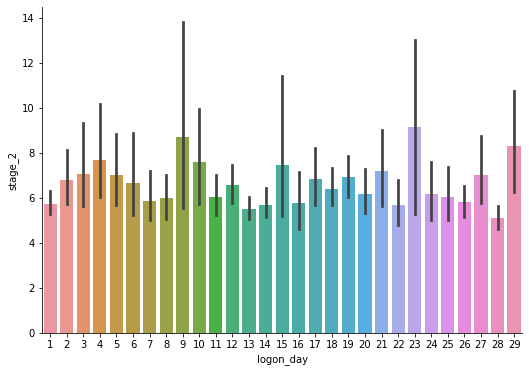

In [241]:
#let us plot  'stage_2' against 'logon_day' to see the effect of the substage 'stage_2'
# on the instaces launched in each day

sns.catplot(x='logon_day',
                  y='stage_2', kind="bar", height=5.27, aspect=11.7/8.27, data=high_launch_time_df)


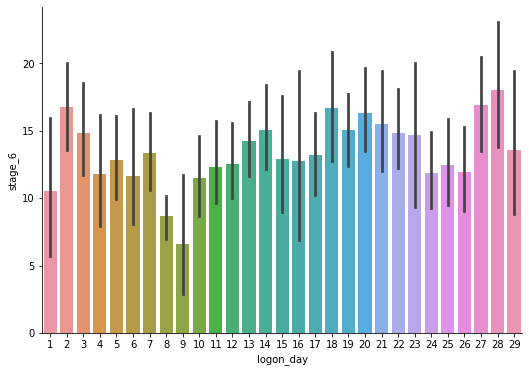

In [242]:
# let us plot  'stage_6' against 'logon_day' to see the effect of the substage 'stage_6'
# on instaces launched in each day

sns.catplot(x='logon_day',
                  y='stage_6', kind="bar", height=5.27, aspect=11.7/8.27, data=high_launch_time_df)

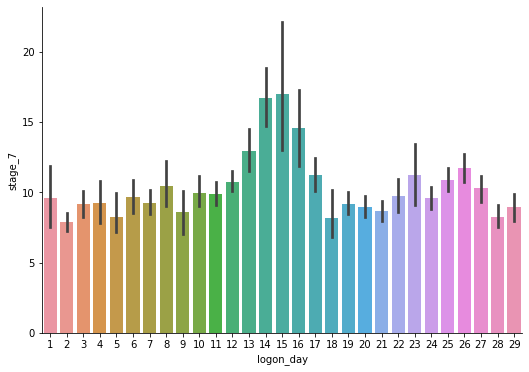

In [243]:
# let us plot  'stage_7' against 'logon_day' to see the effect of the substage 'stage_7'
# on instaces launched in each day

sns.catplot(x='logon_day',
                  y='stage_7', kind="bar", height=5.27, aspect=11.7/8.27, data=high_launch_time_df)

In [244]:
# Since the mean of sample distribution means of stage_2, stage_6 and stage_7 substages: 10.14
# we will consider the 10 as a refernce to compute the set of high impacted days 

high_launch_sg_2_6_7 = high_launch_time_df.loc[(high_launch_time_df['stage_2'] > 10 ) & (high_launch_time_df['stage_6'] > 10) & 
                                              (high_launch_time_df['stage_7'] > 10)]
print(high_launch_sg_2_6_7[['logon_day', 'total_sec',  'stage_6', 'stage_7']])

      logon_day  total_sec  stage_6  stage_7
102          25     70.453   37.967   12.253
105          19     56.008   25.560   11.556
234           2     52.520   10.500   10.360
528          27     84.205   35.936   12.707
588          21     88.026   30.273   13.710
1050         16     68.750   35.084   10.650
1252         17     64.582   10.203   10.590
1352         23     56.889   20.910   11.384
1432          7     74.995   24.910   10.090
1954         22     49.940   18.307   14.603


In [245]:
# Observe the high impacted days due to the significant amount of time consumed by stage_2, 
# stage_6 and stage_7

set_high_launch_stage_2_6_7_days = set(high_launch_sg_2_6_7['logon_day'].unique())
print( "Set of High Impacted days due to the substantial chunk of launch time consumed by stage 2,6 and 7: ")
set_high_launch_stage_2_6_7_days

Set of High Impacted days due to the substantial chunk of launch time consumed by stage 2,6 and 7: 


{2, 7, 16, 17, 19, 21, 22, 23, 25, 27}

In [246]:
#Let us also determine the highly loaded days due to the large number of instances, as caluclated
# above the average number of instace count per day is ~4 , we will take it a refernce value

high_inst_load_day_df = per_day_load_df.loc[per_day_load_df['inst_count'] >= 4]
set_high_inst_load_days = set(high_inst_load_day_df['logon_day'].unique())
print( "Set of Highly Loaded days due to the large number of instances launched :")
print(set_high_inst_load_days)

Set of Highly Loaded days due to the large number of instances launched :
{2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29}


In [247]:
# Find intersection  of two sets above to determine  the most affected or higly impacted days due 
# to the combined effect for significant time consumption in substages stage_2, stage_6 and stage_7 
# and  the high number of instaces instantiated in a day.

print("Most Affected or Highly Impacted days due to the  combined effect of significant time consumption " + 
       "in stage_2, stage_6 and stage_7 and the high number of instaces instantiated in a day: ")
list(set_high_launch_stage_2_6_7_days & set_high_inst_load_days ) 

Most Affected or Highly Impacted days due to the  combined effect of significant time consumption in stage_2, stage_6 and stage_7 and the high number of instaces instantiated in a day: 


[2, 7, 16, 17, 19, 21, 22, 25, 27]

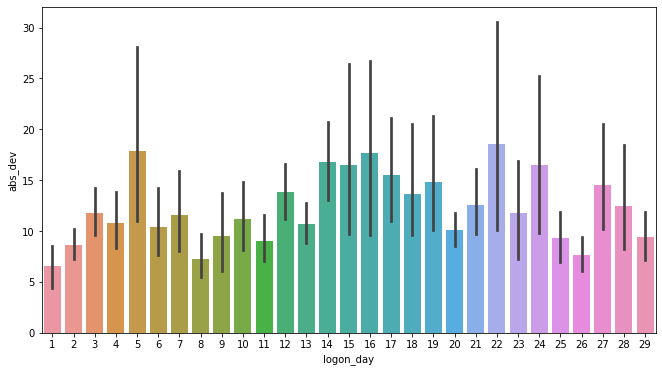

In [248]:
# let us plot the "abs_dev" bar graph again (which have already performed and analyzed above while answering 
# question 1 and 2) to compare and analyze the above derived list with the "absolute deviation" for
# each instance. 

# It is an important exploratory data analysis to get the feel of the  'launch time 
# duration' variabilty experinced by the users per day over a month. 

# The robust measure for this is to compute the "absolute deviation"  which is defined 
# by  D(i) = | X(i) - median(X)| and stored in a new column 'abs_dev', 
# X(i)=>  launch time duration 'total_sec' for ith intance 
# and median(X)  =>  the mean of  launch time duration 'total_sec' samples

plt.figure(figsize=(11,6))
ax = sns.barplot(x = "logon_day", y = "abs_dev", data = launch_stats_df )

#### Analysis 
We could observe from the above bar plot which demonstrates "absolute deviation” of ‘launch duration' per day basis. We could get an insight  from the above graph that the high "absolute deviation" days are superset of the most affected or highly impacted days listed  above [2, 7, 16, 17, 19, 21, 22, 25, 27]: it exhibits an interesting fact and notable facet in this study that computed list is an intersection of the two sets which resulted the most affected or highly impacted days due to the combined effect of two notable aspects that is the  significant time consumption in  substages stage_2, stage_6, stage_7 and the high number of instances launched  in a day.

#### Conclusion
Hence, we can conclude through deep inspection of the above analysis to identify the potential root cause for question 3: the most affected or highly impacted days identified through our investigations are due to the combined effect of two crucial aspects in the context of the study, that is “significant time consumption in  substages stage_2, stage_6, stage_7 and the high number of instances launched in a day.” We have also revealed the fact  from the above analysis that the "list of highly penalized days" detected above are also a major subset of above bar plot which demonstrates significant 
"absolute deviation" or "temporal changes" in the magnitude of launch duration time.The other unexplored days which also have  relatively high "absolute deviation” in the above bar plot are may be due to the some other reasons such as low network bandwidth, machine hardware configuration etc. that has not been experimented in this investigation.
